In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2, os, shutil, re, math, urllib
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image

cwd = os.getcwd()

# Create Grid Images

In [2]:
# Create 4-image grid of Wool_22
img1 = plt.imread(cwd+"/samples/Wool_22_im_1.png")
img2 = plt.imread(cwd+"/samples/Wool_22_im_2.png")
img3 = plt.imread(cwd+"/samples/Wool_22_im_3.png")
img4 = plt.imread(cwd+"/samples/Wool_22_im_4.png")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax[0,0].imshow(img1)
ax[0,0].axis('off')
ax[0,1].imshow(img2)
ax[0,1].axis('off')
ax[1,0].imshow(img3)
ax[1,0].axis('off')
ax[1,1].imshow(img4)
ax[1,1].axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.show()
fig.savefig(cwd+'/figs/wool_22_1-4.png', bbox_inches='tight')

In [3]:
# Create 4-image grid of Denim_1
img1 = plt.imread(cwd+"/samples/Denim_1_im_1.png")
img2 = plt.imread(cwd+"/samples/Denim_1_im_2.png")
img3 = plt.imread(cwd+"/samples/Denim_1_im_3.png")
img4 = plt.imread(cwd+"/samples/Denim_1_im_4.png")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax[0,0].imshow(img1)
ax[0,0].axis('off')
ax[0,1].imshow(img2)
ax[0,1].axis('off')
ax[1,0].imshow(img3)
ax[1,0].axis('off')
ax[1,1].imshow(img4)
ax[1,1].axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.show()
fig.savefig(cwd+'/figs/denim_1_1-4.png')

In [4]:
img1 = plt.imread(cwd+"/samples/Wool_22_im_1.png")

# Get the dimensions of the image
height, width, _ = img1.shape

# Calculate the center point
center_y, center_x = height // 2, width // 2

# Extract the four subimages
subimg1 = img1[:center_y, :center_x]
subimg2 = img1[:center_y, center_x:]
subimg3 = img1[center_y:, :center_x]
subimg4 = img1[center_y:, center_x:]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Display the subimages in the subplots
axes[0, 0].imshow(subimg1)
axes[0, 0].axis('off')
axes[0, 1].imshow(subimg2)
axes[0, 1].axis('off')
axes[1, 0].imshow(subimg3)
axes[1, 0].axis('off')
axes[1, 1].imshow(subimg4)
axes[1, 1].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.show()
fig.savefig(cwd+'/figs/wool_22_1a-d.png')

In [6]:
img1 = plt.imread(cwd+"/samples/Denim_1_im_1.png")

# Get the dimensions of the image
height, width, _ = img1.shape

# Calculate the center point
center_y, center_x = height // 2, width // 2

# Extract the four subimages
subimg1 = img1[:center_y, :center_x]
subimg2 = img1[:center_y, center_x:]
subimg3 = img1[center_y:, :center_x]
subimg4 = img1[center_y:, center_x:]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Display the subimages in the subplots
axes[0, 0].imshow(subimg1)
axes[0, 0].axis('off')
axes[0, 1].imshow(subimg2)
axes[0, 1].axis('off')
axes[1, 0].imshow(subimg3)
axes[1, 0].axis('off')
axes[1, 1].imshow(subimg4)
axes[1, 1].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.show()
fig.savefig(cwd+'/figs/denim_1_1a-d.png')

# Subsample Images into Quarters & Rename

In [10]:
"""
Assumes the following folder architecture: 

fabric[repo]/
├── Samples/
│   ├── Blended/
│   │   ├── 6
│   │   │   ├── im_1.png
|   │   │   └── im_2.png
│   │   └── 13
│   │   │   ├── im_1.png
|   │   │   └── im_2.png
│   └── Wool/
│   │   ├── 7
│   │   │   ├── im_1.png
|   │   │   └── im_2.png
│   │   └── 22
│   │   │   ├── im_1.png
|   │   │   └── im_2.png
├── Subsamples/ <--- will create if not already present
│   ├── Blended_6_im_1a.png <--- new subsampled image 
│   ├── Blended_6_im_1b.png
│   ├── Blended_6_im_1c.png
│   ├── Blended_6_im_1d.png
""";

In [7]:
''' 
Creates a new subdir for subsampled images called "Subsamples." 
Copies each image from the desired classes (subdirs) of samples then renames to include class name.
Splits each image into 4 subimages.
'''

samples_dir = os.path.join(cwd, "Samples")
subsamples_dir = os.path.join(cwd, "Subsamples")

# Define the subdirectory names
subdirs = ["Blended", "Wool", "Polyester", "Cotton", "Denim"]

# Create the subsampled fabrics directory if it doesn't exist
os.makedirs(subsamples_dir, exist_ok=True)

# Initialize the progress bar
total_files = sum(sum(len([f for f in os.listdir(os.path.join(subdir_path, numbered_subdir))
                          if f.endswith('.png')])
                      for numbered_subdir in os.listdir(subdir_path)
                      if os.path.isdir(os.path.join(subdir_path, numbered_subdir)))
                  for subdir_path in [os.path.join(samples_dir, subdir) for subdir in subdirs])
pbar = tqdm(total=total_files, unit=' files', desc='Processing images')

# Loop through each subdirectory
for subdir in subdirs:
    subdir_path = os.path.join(samples_dir, subdir)

    # Loop through each numbered subdirectory within the current subdirectory
    for numbered_subdir in os.listdir(subdir_path):
        numbered_subdir_path = os.path.join(subdir_path, numbered_subdir)

        # Check if the current path is a directory
        if os.path.isdir(numbered_subdir_path):

            # Loop through each file in the numbered subdirectory
            for filename in os.listdir(numbered_subdir_path):

                # Check if the file is an image
                if filename.endswith(".png"):

                    # Construct the new filename with the subdirectory name
                    new_filename = f"{subdir}_{numbered_subdir}_{filename}"
                    src_path = os.path.join(numbered_subdir_path, filename)
                    dst_path = os.path.join(subsamples_dir, new_filename)

                    # Copy the image with the new filename to the combined directory
                    shutil.copy(src_path, dst_path)

                    # Load the image
                    img = cv2.imread(dst_path)

                    # Get the dimensions of the image
                    height, width, _ = img.shape

                    # Calculate the center point
                    center_y, center_x = height // 2, width // 2

                    # Extract the four subimages
                    subimg1 = img[:center_y, :center_x]
                    subimg2 = img[:center_y, center_x:]
                    subimg3 = img[center_y:, :center_x]
                    subimg4 = img[center_y:, center_x:]

                    # Save the subimages with new filenames
                    base_filename, ext = os.path.splitext(new_filename)
                    cv2.imwrite(os.path.join(subsamples_dir, f"{base_filename}a{ext}"), subimg1)
                    cv2.imwrite(os.path.join(subsamples_dir, f"{base_filename}b{ext}"), subimg2)
                    cv2.imwrite(os.path.join(subsamples_dir, f"{base_filename}c{ext}"), subimg3)
                    cv2.imwrite(os.path.join(subsamples_dir, f"{base_filename}d{ext}"), subimg4)

                    # Remove the original image
                    os.remove(dst_path)

                    # Update the progress bar
                    pbar.update(1)

# Close the progress bar
pbar.close()

# When complete, 23,636 images should be in Subsamples folder 
# Delete Blended_107_im_2 (copy)a-d.png 
# 23,636 - 4 = 23,632


In [ ]:
''' 
Image Counts

Blended: 6576
Cotton: 9408
Denim: 2592 
Polyester: 3616 
Wool: 1440 
''';

# Train + Test Split (Stratefied Sampling)

In [8]:
classes = ["Blended", "Wool", "Polyester", "Cotton", "Denim"]
subsamples_dir = os.path.join(cwd, "Subsamples")

# Create the train and test directories
train_dir = os.path.join(subsamples_dir, 'train')
test_dir = os.path.join(subsamples_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each class
for class_name in classes:
    class_images = [os.path.join(subsamples_dir, f) for f in os.listdir(subsamples_dir) if f.startswith(f'{class_name}_') and f.endswith('.png')]
    train_images, test_images = train_test_split(class_images, test_size=0.2, random_state=42)

    # Move the train images to the train directory
    for image in train_images:
        shutil.move(image, os.path.join(train_dir, os.path.basename(image)))

    # Move the test images to the test directory
    for image in test_images:
        shutil.move(image, os.path.join(test_dir, os.path.basename(image)))

# Train: 18903 images
# Test:   4729 images
# Total: 23632 images

# Augment Data by Flipping Images Horizontally

In [9]:
'''  
Only augment train data !!!
'''

train_dir = os.path.join(cwd, "Subsamples/train")

# Loop through all files in the folder
for filename in os.listdir(train_dir):
    # Check if the filename starts with "Wool_" or "Denim_"
    if filename.startswith(('Wool_', 'Denim_')):
        # Construct the full file path
        file_path = os.path.join(train_dir, filename)

        # Load the image
        image = cv2.imread(file_path)

        # Make a copy of the image
        base_name, extension = os.path.splitext(filename)
            # Construct the new filename
        pattern = r'(_)(\d+)(_)'
        new_base_name = re.sub(pattern, r'\1f\2\3', base_name)
        f_filename = new_base_name + extension
        f_file_path = os.path.join(train_dir, f_filename)
        shutil.copy(file_path, f_file_path)

        # Load the copied image
        f_image = cv2.imread(f_file_path)

        # Flip the image horizontally
        flipped_image = cv2.flip(f_image, 1)

        cv2.imwrite(f_file_path, flipped_image)

# Create Average Images (per class)

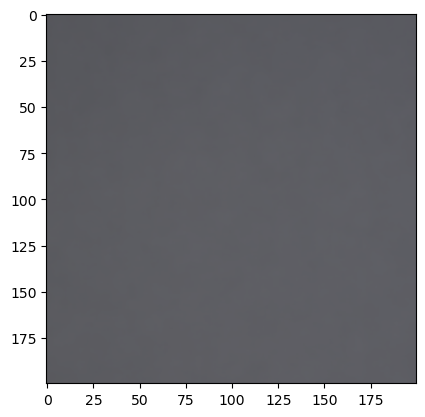

In [20]:
classes = ["Blended", "Wool", "Polyester", "Cotton", "Denim"]
train_dir = os.path.join(cwd, "Subsamples/train")
avg_dir = os.path.join(cwd, "Subsamples/avg")

# Create avgs directory if it doesn't exist
os.makedirs(avg_dir, exist_ok=True)

# Get the dimensions of one image
img1 = plt.imread(os.path.join(train_dir, 'Wool_f817_im_1b.png'))
height, width, depth = img1.shape

avg_imgs = []
for cls in classes[:1]:
    sum_img = np.zeros((height, width, depth), dtype=np.float32)
    count = 0
    for filename in os.listdir(train_dir):
        if filename.startswith(cls):
            temp_img = plt.imread(os.path.join(train_dir, filename))
            sum_img += temp_img
            count += 1
    avg_img = sum_img / count

    plt.imshow(avg_img)
    avg_filename = os.path.join(avg_dir, f"{cls}_avg.png")
    plt.imsave(avg_filename, avg_img)